In [47]:
import pandas as pd
import numpy as np
import matplotlib
import os
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
%matplotlib inline

In [48]:
def figure_for_scatter():
    f = plt.figure(figsize=(12, 12))

In [49]:
print "Current working directory: "+os.getcwd()

Current working directory: D:\Git\TokenRing\research


In [50]:
column_names = ["sen", "rec", "ret", "cir", "top","tok","mess","rush","sil","s_m","s_n","er", "nans"]
path_to_meta = os.getcwd()+"\\results.txt"

In [51]:
data = pd.read_table(path_to_meta, sep=' ', names=column_names)
data = data.drop(data.index[0])
data = data.drop("nans", axis=1)
data["sen"].apply(pd.to_numeric, errors='coerce')
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,695445.0,703699.5,713963.0,9371.0,2,1,1000,true,true,10,10,false
2,450243.0,457383.0,463853.0,10264.0,2,2,1000,true,true,10,10,false
3,3730901.5,3759014.5,3775078.0,30344.0,3,1,1000,true,true,10,10,false
4,3556427.0,3601273.5,3639426.0,63810.0,3,2,1000,true,true,10,10,false
5,2486376.0,2534122.0,2584546.0,73181.0,3,3,1000,true,true,10,10,false


In [52]:
cols_numeric = ["sen", "rec", "ret", "cir", "top","tok","mess","s_m","s_n"]
data[cols_numeric] = data[cols_numeric].apply(pd.to_numeric, errors='coerce', axis=1)

In [53]:
d = {'true': True, 'false': False}

In [54]:
for col in ["rush","sil", "er"]:
    data[col] = data[col].map(d)
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,695445.0,703699.5,713963.0,9371.0,2.0,1.0,1000.0,True,True,10.0,10.0,False
2,450243.0,457383.0,463853.0,10264.0,2.0,2.0,1000.0,True,True,10.0,10.0,False
3,3730901.5,3759014.5,3775078.0,30344.0,3.0,1.0,1000.0,True,True,10.0,10.0,False
4,3556427.0,3601273.5,3639426.0,63810.0,3.0,2.0,1000.0,True,True,10.0,10.0,False
5,2486376.0,2534122.0,2584546.0,73181.0,3.0,3.0,1000.0,True,True,10.0,10.0,False


## Plots

In [55]:
data.to_csv("data_hw2.csv", index= True, sep=" ", encoding= "utf_8")

In [56]:
rush_early = data.loc[np.logical_and(data.er == 1, data.rush == 1)]
rush_early_1toc = rush_early.loc[np.logical_and(rush_early.tok == 1, True)]
rush_early_11nodes = rush_early.loc[np.logical_and(rush_early.top == 11, True)]
rush_early_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
465,769295.0,783128.0,790267.0,12940.0,2.0,1.0,1000.0,True,True,10.0,10.0,True
467,3598373.0,3676908.0,3715730.0,52655.0,3.0,1.0,1000.0,True,True,10.0,10.0,True
470,8528286.0,8682457.0,8785313.0,192324.0,4.0,1.0,1000.0,True,True,10.0,10.0,True
474,11901760.5,12128443.5,12306042.0,335563.0,5.0,1.0,1000.0,True,True,10.0,10.0,True
479,17574195.5,17870266.0,18152505.0,542612.0,6.0,1.0,1000.0,True,True,10.0,10.0,True


In [57]:
rush_noearly = data.loc[np.logical_and(data.er == 0, data.rush == 1)]
rush_noearly_1toc = rush_noearly.loc[np.logical_and(rush_noearly.tok == 1, True)]
rush_noearly_11nodes = rush_noearly.loc[np.logical_and(rush_noearly.top == 11, True)]
rush_noearly_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,695445.0,703699.5,713963.0,9371.0,2.0,1.0,1000.0,True,True,10.0,10.0,False
3,3730901.5,3759014.5,3775078.0,30344.0,3.0,1.0,1000.0,True,True,10.0,10.0,False
6,16752245.5,16830335.0,16905078.5,150601.5,4.0,1.0,1000.0,True,True,10.0,10.0,False
10,30322225.0,30428203.5,30584830.0,224452.0,5.0,1.0,1000.0,True,True,10.0,10.0,False
15,89634241.0,89975605.0,90235978.0,612223.0,6.0,1.0,1000.0,True,True,10.0,10.0,False


In [58]:
norush_early = data.loc[np.logical_and(data.er == 1, data.rush == 0)]
norush_early_1toc = norush_early.loc[np.logical_and(norush_early.tok == 1, True)]
norush_early_11nodes = norush_early.loc[np.logical_and(norush_early.top == 11, True)]
norush_early_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
929,25881.0,37929.5,53101.0,19634.0,2.0,1.0,1000.0,False,True,10.0,10.0,True
931,33913.0,54439.0,70950.0,30790.0,3.0,1.0,1000.0,False,True,10.0,10.0,True
937,86122.0,156849.0,216866.0,121820.0,5.0,1.0,1000.0,False,True,10.0,10.0,True
940,74520.0,137438.0,202587.0,114234.0,4.0,1.0,1000.0,False,True,10.0,10.0,True
943,212627.5,428824.0,603745.0,357651.0,6.0,1.0,1000.0,False,True,10.0,10.0,True


In [59]:
norush_noearly = data.loc[np.logical_and(data.er == 0, data.rush == 0)]
norush_noearly_1toc = norush_noearly.loc[np.logical_and(norush_noearly.tok == 1, True)]
norush_noearly_11nodes = norush_noearly.loc[np.logical_and(norush_noearly.top == 11, True)]
norush_noearly.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1393,19634.0,29451.0,38822.0,15172.0,2.0,1.0,1000.0,False,True,10.0,10.0,False
1394,36590.5,53547.5,71397.0,30343.0,3.0,1.0,1000.0,False,True,10.0,10.0,False
1395,43953.5,71842.5,93708.0,44622.0,3.0,2.0,1000.0,False,True,10.0,10.0,False
1396,33913.0,56225.0,77644.0,35698.0,3.0,3.0,1000.0,False,True,10.0,10.0,False
1397,64256.5,120035.0,171574.5,91476.0,4.0,1.0,1000.0,False,True,10.0,10.0,False


[]

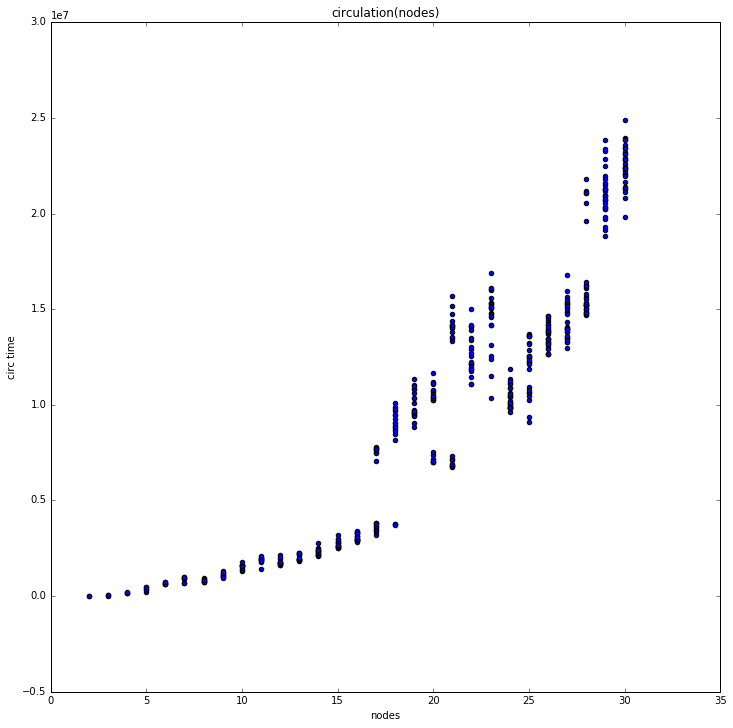

In [60]:
figure_for_scatter()
plt.title("circulation(nodes)")
plt.ylabel("circ time")
plt.xlabel("nodes")
plt.scatter(rush_noearly["top"], rush_noearly["cir"])
plt.plot()

## 1. Throughput(topology_size)

Рассмотрим случай одного токена, как классический

[]

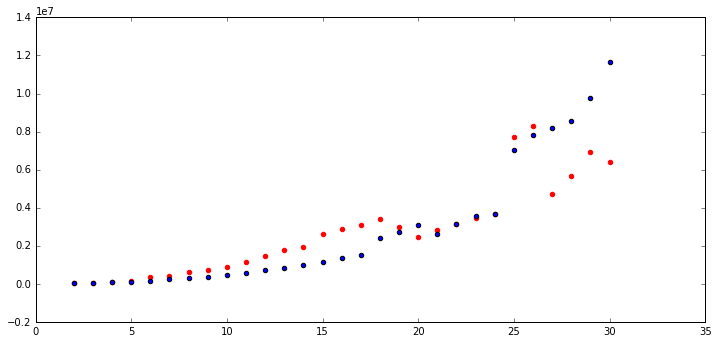

In [61]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"])
plt.plot()

[]

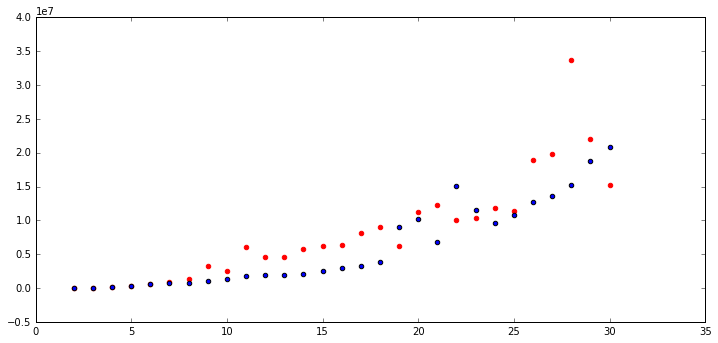

In [62]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"])
plt.plot()

[]

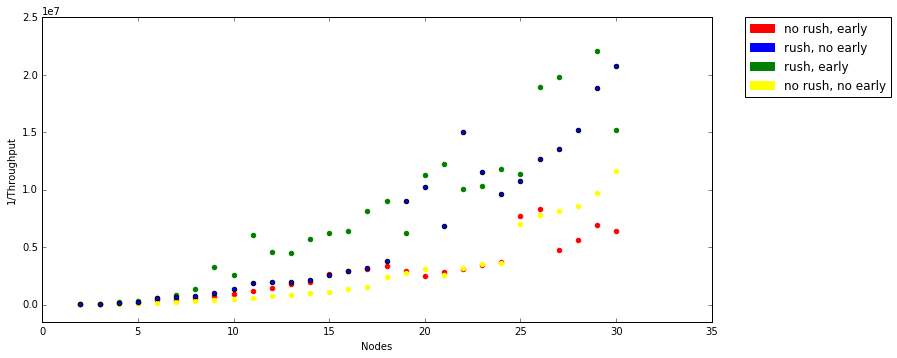

In [77]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"]/norush_early_1toc["tok"], color="red")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"]/rush_early_1toc["tok"], color="green")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"]/norush_noearly_1toc["tok"], color="yellow")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"]/rush_noearly_1toc["tok"])

red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.ylim(ymax=25000000, ymin = -1500000)

plt.plot()

[]

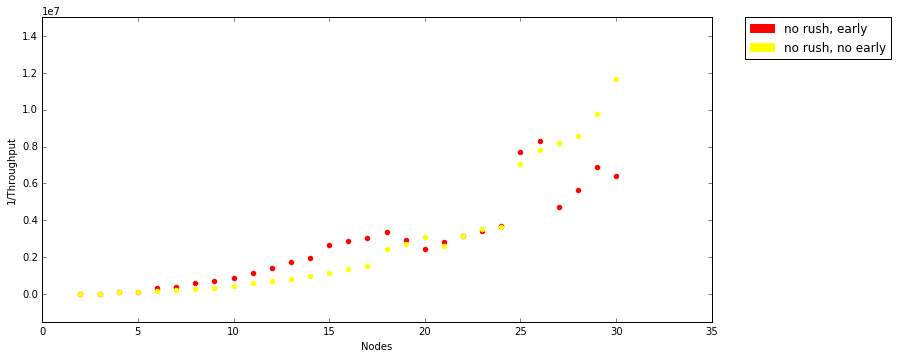

In [85]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"]/norush_early_1toc["tok"], color="red")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"]/norush_noearly_1toc["tok"], color="yellow")

red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, yellow_patch])
plt.ylim(ymax=15000000, ymin = -1500000)

plt.plot()

## 2. Latency(topology_size)

[]

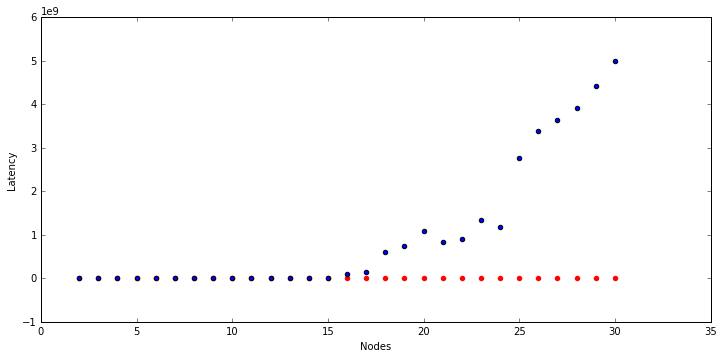

In [64]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("Latency")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["rec"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["rec"])
plt.plot()

[]

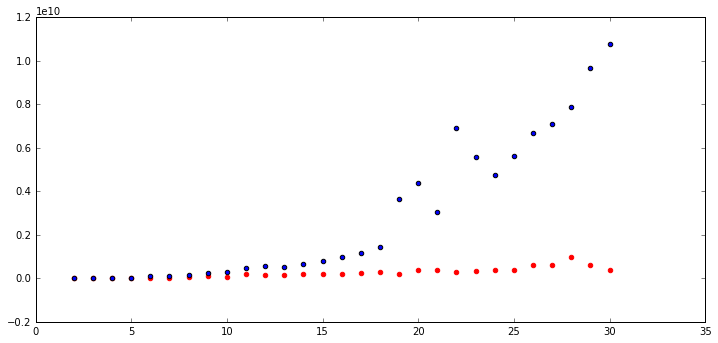

In [65]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(rush_early_1toc["top"], rush_early_1toc["rec"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["rec"])
plt.plot()

[]

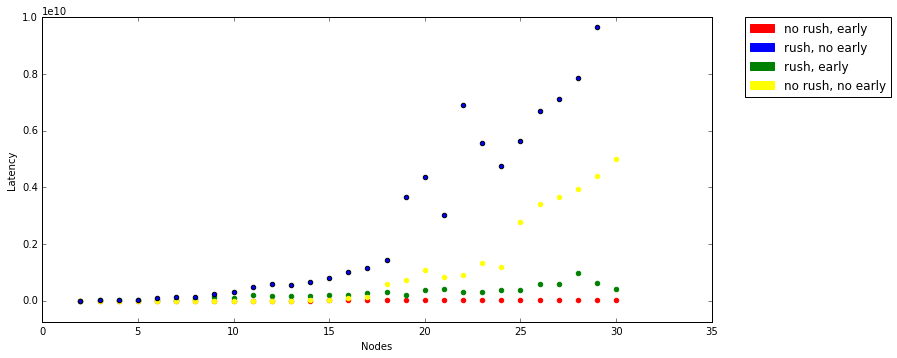

In [82]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_1toc["top"], norush_early_1toc["rec"]/norush_early_1toc["tok"], color="red")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["rec"]/rush_early_1toc["tok"], color="green")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["rec"]/norush_noearly_1toc["tok"], color="yellow")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["rec"]/rush_noearly_1toc["tok"])
plt.xlabel("Nodes")
plt.ylabel("Latency")
red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.ylim(ymax=10000000000, ymin = -750000000)
plt.plot()

[]

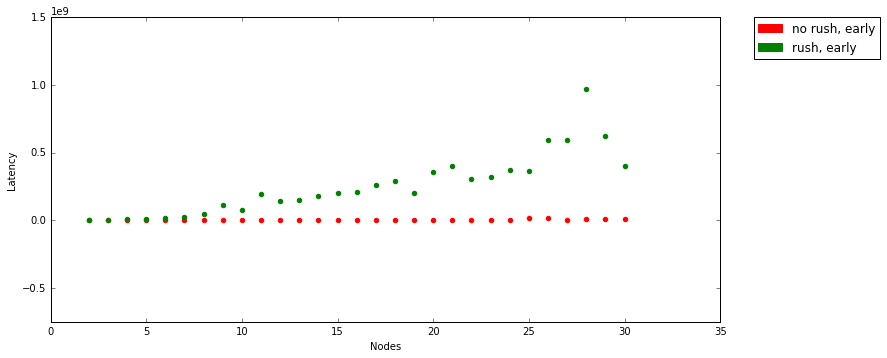

In [87]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_1toc["top"], norush_early_1toc["rec"]/norush_early_1toc["tok"], color="red")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["rec"]/rush_early_1toc["tok"], color="green")
plt.xlabel("Nodes")
plt.ylabel("Latency")
red_patch = mpatches.Patch(color='red', label='no rush, early')
green_patch = mpatches.Patch(color='green', label='rush, early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, green_patch])
plt.ylim(ymax=1500000000, ymin = -750000000)
plt.plot()

## 3. Throughput(tokens)

[]

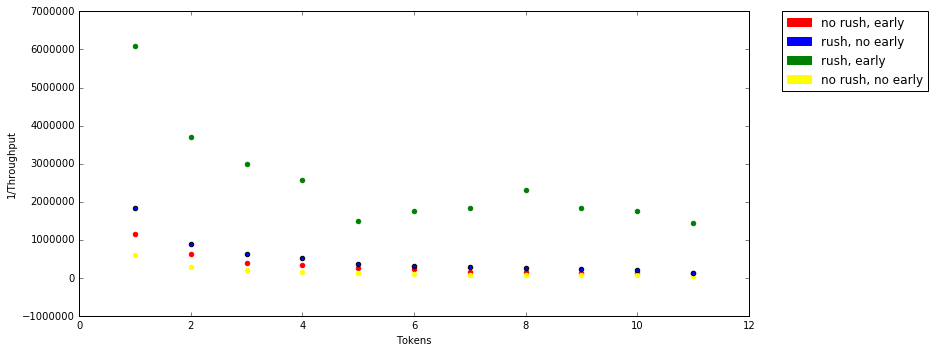

In [72]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_11nodes["tok"], norush_early_11nodes["cir"]/norush_early_11nodes["tok"], color="red")
plt.scatter(rush_early_11nodes["tok"], rush_early_11nodes["cir"]/rush_early_11nodes["tok"], color="green")
plt.scatter(norush_noearly_11nodes["tok"], norush_noearly_11nodes["cir"]/norush_noearly_11nodes["tok"], color="yellow")
plt.scatter(rush_noearly_11nodes["tok"], rush_noearly_11nodes["cir"]/rush_noearly_11nodes["tok"])
plt.xlabel("Tokens")
plt.ylabel("1/Throughput")
red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

[]

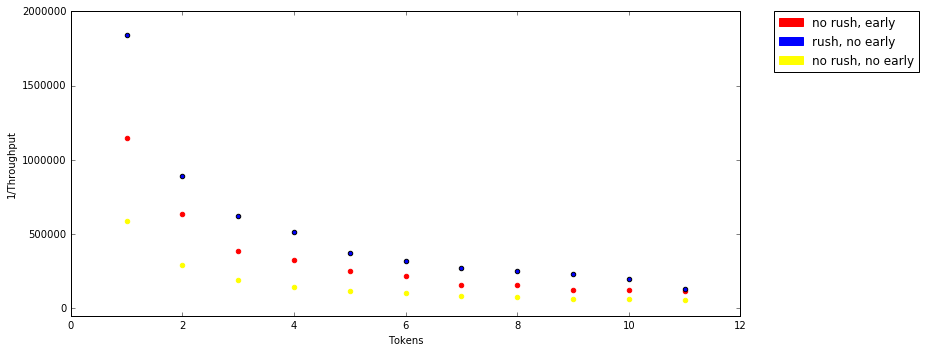

In [96]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_11nodes["tok"], norush_early_11nodes["cir"]/norush_early_11nodes["tok"], color="red")
plt.scatter(norush_noearly_11nodes["tok"], norush_noearly_11nodes["cir"]/norush_noearly_11nodes["tok"], color="yellow")
plt.scatter(rush_noearly_11nodes["tok"], rush_noearly_11nodes["cir"]/rush_noearly_11nodes["tok"])
plt.xlabel("Tokens")
plt.ylabel("1/Throughput")
red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, yellow_patch])
plt.ylim(ymax=2000000, ymin = -50000)

plt.plot()

## 4. Latency(tokens)

In [ ]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_11nodes["tok"], norush_early_11nodes["rec"]/norush_early_11nodes["tok"], color="red")
plt.scatter(norush_noearly_11nodes["tok"], norush_noearly_11nodes["rec"]/norush_noearly_11nodes["tok"], color="yellow")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, yellow_patch])
plt.ylim(ymax=750000, ymin = -50000)
plt.subplot(212)
plt.scatter(rush_early_11nodes["tok"], rush_early_11nodes["rec"]/rush_early_11nodes["tok"], color="green")
plt.scatter(rush_noearly_11nodes["tok"], rush_noearly_11nodes["rec"]/rush_noearly_11nodes["tok"])

red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.ylim(ymax=65000000, ymin = -50000)

plt.plot()

[]

[]

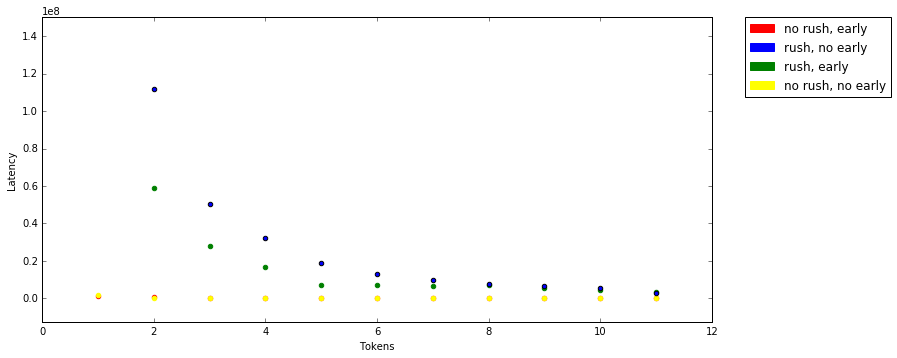

In [84]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_11nodes["tok"], norush_early_11nodes["rec"]/norush_early_11nodes["tok"], color="red")
plt.scatter(norush_noearly_11nodes["tok"], norush_noearly_11nodes["rec"]/norush_noearly_11nodes["tok"], color="yellow")
plt.scatter(rush_early_11nodes["tok"], rush_early_11nodes["rec"]/rush_early_11nodes["tok"], color="green")
plt.scatter(rush_noearly_11nodes["tok"], rush_noearly_11nodes["rec"]/rush_noearly_11nodes["tok"])
plt.ylim(ymax=150000000, ymin = -12500000)
red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()